# Principal Component Analysis

In [55]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits

import plotly.express as px

In [3]:
digit_data = load_digits()
dir(digit_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df = pd.DataFrame(digit_data.data, columns= digit_data.feature_names)
df['Target'] = digit_data.target

In [6]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


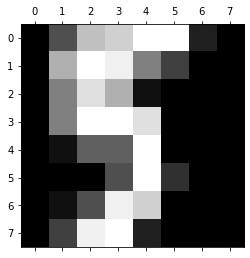

In [7]:
plt.matshow(digit_data.images[15])
plt.gray()

In [8]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [10]:
df.isna().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Target       0
Length: 65, dtype: int64

In [11]:
x = df.drop('Target', axis = 1)
y = df['Target']

In [12]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [13]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: Target, Length: 1797, dtype: int32

# Train Test Split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [15]:
x_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
928,0.0,2.0,13.0,16.0,15.0,1.0,0.0,0.0,0.0,7.0,...,6.0,0.0,0.0,1.0,15.0,16.0,16.0,9.0,1.0,0.0
1514,0.0,0.0,0.0,0.0,5.0,15.0,6.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,4.0,0.0
1670,0.0,1.0,6.0,12.0,15.0,5.0,0.0,0.0,0.0,7.0,...,7.0,0.0,0.0,0.0,6.0,16.0,14.0,8.0,0.0,0.0
1192,0.0,3.0,14.0,14.0,16.0,16.0,10.0,0.0,0.0,9.0,...,0.0,0.0,0.0,3.0,15.0,16.0,4.0,0.0,0.0,0.0
293,0.0,0.0,7.0,13.0,16.0,7.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,6.0,15.0,15.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,0.0,3.0,12.0,16.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,16.0,6.0,0.0,0.0
1544,0.0,0.0,1.0,10.0,11.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0
1705,0.0,0.0,7.0,14.0,11.0,0.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,3.0,0.0
418,0.0,1.0,14.0,13.0,12.0,8.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,12.0,14.0,12.0,4.0,0.0,0.0


In [16]:
x_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1403,0.0,0.0,9.0,16.0,13.0,1.0,0.0,0.0,0.0,8.0,...,4.0,1.0,0.0,0.0,8.0,16.0,16.0,16.0,16.0,12.0
1354,0.0,0.0,0.0,12.0,14.0,1.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,11.0,16.0,15.0,5.0,0.0
1702,0.0,0.0,7.0,11.0,13.0,8.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,10.0,14.0,2.0,0.0,0.0,0.0
274,0.0,0.0,2.0,12.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,13.0,16.0,3.0,0.0,0.0
1656,0.0,0.0,3.0,9.0,14.0,9.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,2.0,15.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,9.0,15.0,16.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0
701,0.0,0.0,0.0,9.0,15.0,6.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.0,13.0,5.0,0.0,0.0
893,0.0,1.0,13.0,16.0,16.0,16.0,12.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,15.0,16.0,10.0,0.0,0.0,0.0
400,0.0,0.0,0.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,0.0


# Without PCA

In [18]:
std_scaler = StandardScaler()
std_array = std_scaler.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

In [20]:
# x_train_std

# Model Training

In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
knn_model.score(x_train,y_train)

0.9916492693110647

In [23]:
knn_model.score(x_train_std,y_train)

0.2588726513569937

# With PCA

In [34]:
std_scaler = StandardScaler()
std_array = std_scaler.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)


pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(x_train_std)
pc_names = [f'PC{i}' for i in range(1,x_train_pca.shape[1] + 1)]
x_train_pca = pd.DataFrame(x_train_pca, columns=pc_names)

In [35]:
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-3.806972,-0.762353,-1.981745,-1.241902,-1.926016,1.708180,0.118980,-1.737105,-0.334048,0.155811,...,-0.316694,-0.305804,-0.016301,0.264197,0.362151,0.055375,-0.003551,0.000000e+00,-0.000000e+00,7.203496e-15
1,2.706772,0.985010,-3.093263,-4.090354,-0.314418,0.923529,1.899720,-0.178551,-1.099549,0.541563,...,-0.119631,0.136834,-0.197849,-0.184090,-0.023752,-0.119777,-0.041736,-1.014866e-16,-5.731277e-17,4.717562e-17
2,-1.875040,-0.586259,0.025851,-1.458836,-0.387337,0.288262,1.600423,-1.774906,0.527612,-0.223360,...,-0.334997,-0.160068,0.134346,-0.054102,0.206992,-0.315449,0.058982,6.865778e-16,-4.189473e-17,-1.078469e-16
3,-4.188463,3.264263,1.434903,3.787396,1.109394,0.870372,2.532590,-1.705008,-1.871973,0.434290,...,0.528239,-0.015123,-0.105772,0.066680,0.075781,-0.096029,-0.028511,2.153337e-16,2.471406e-16,1.661149e-17
4,-0.759938,1.592627,-3.138049,-0.593354,-0.196136,-0.595561,0.866253,0.549402,-0.183254,-0.240831,...,0.170132,-0.079203,0.270092,-0.182597,-0.096756,-0.090261,0.057124,1.921231e-16,-1.408782e-16,3.752618e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.608133,2.305245,-1.419637,-1.319994,0.776468,-0.396090,0.512074,0.515910,1.199450,-0.726217,...,0.178430,-0.186958,0.538635,0.401713,0.320665,0.131800,0.212507,5.326296e-17,4.198184e-17,-1.213150e-17
1433,0.511413,1.218487,-0.221379,-0.088338,0.700141,-1.358485,0.661075,0.830278,0.995568,-0.172373,...,0.187069,-0.588471,-0.193879,0.417202,0.294628,0.187941,-0.103895,2.718284e-16,1.636452e-17,-2.201464e-17
1434,-0.736783,-1.238905,-0.048362,-0.600326,0.029270,0.109190,-0.015670,-0.858145,1.403713,-1.187124,...,0.020321,-0.153543,-0.230250,0.057210,-0.062775,0.575475,0.108348,-1.430479e-16,3.084321e-17,-1.732616e-17
1435,-2.526435,1.357900,-1.357264,0.659848,-0.079780,0.749792,2.240776,0.846507,0.676734,-1.342595,...,-0.177704,-0.879487,-0.578543,0.066651,0.293642,-0.226380,0.278342,-6.990199e-18,1.272191e-17,-4.900187e-17


In [36]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [37]:
knn_model.score(x_train_pca,y_train)

0.9860821155184412

In [38]:
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-3.806972,-0.762353,-1.981745,-1.241902,-1.926016,1.708180,0.118980,-1.737105,-0.334048,0.155811,...,-0.316694,-0.305804,-0.016301,0.264197,0.362151,0.055375,-0.003551,0.000000e+00,-0.000000e+00,7.203496e-15
1,2.706772,0.985010,-3.093263,-4.090354,-0.314418,0.923529,1.899720,-0.178551,-1.099549,0.541563,...,-0.119631,0.136834,-0.197849,-0.184090,-0.023752,-0.119777,-0.041736,-1.014866e-16,-5.731277e-17,4.717562e-17
2,-1.875040,-0.586259,0.025851,-1.458836,-0.387337,0.288262,1.600423,-1.774906,0.527612,-0.223360,...,-0.334997,-0.160068,0.134346,-0.054102,0.206992,-0.315449,0.058982,6.865778e-16,-4.189473e-17,-1.078469e-16
3,-4.188463,3.264263,1.434903,3.787396,1.109394,0.870372,2.532590,-1.705008,-1.871973,0.434290,...,0.528239,-0.015123,-0.105772,0.066680,0.075781,-0.096029,-0.028511,2.153337e-16,2.471406e-16,1.661149e-17
4,-0.759938,1.592627,-3.138049,-0.593354,-0.196136,-0.595561,0.866253,0.549402,-0.183254,-0.240831,...,0.170132,-0.079203,0.270092,-0.182597,-0.096756,-0.090261,0.057124,1.921231e-16,-1.408782e-16,3.752618e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.608133,2.305245,-1.419637,-1.319994,0.776468,-0.396090,0.512074,0.515910,1.199450,-0.726217,...,0.178430,-0.186958,0.538635,0.401713,0.320665,0.131800,0.212507,5.326296e-17,4.198184e-17,-1.213150e-17
1433,0.511413,1.218487,-0.221379,-0.088338,0.700141,-1.358485,0.661075,0.830278,0.995568,-0.172373,...,0.187069,-0.588471,-0.193879,0.417202,0.294628,0.187941,-0.103895,2.718284e-16,1.636452e-17,-2.201464e-17
1434,-0.736783,-1.238905,-0.048362,-0.600326,0.029270,0.109190,-0.015670,-0.858145,1.403713,-1.187124,...,0.020321,-0.153543,-0.230250,0.057210,-0.062775,0.575475,0.108348,-1.430479e-16,3.084321e-17,-1.732616e-17
1435,-2.526435,1.357900,-1.357264,0.659848,-0.079780,0.749792,2.240776,0.846507,0.676734,-1.342595,...,-0.177704,-0.879487,-0.578543,0.066651,0.293642,-0.226380,0.278342,-6.990199e-18,1.272191e-17,-4.900187e-17


In [39]:
std_scaler = StandardScaler()
std_array = std_scaler.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)

accuracy_list = []
for i in range(1,x_train_std.shape[1] + 1):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_std)
    pc_names = [f'PC{i}' for i in range(1,x_train_pca.shape[1] + 1)]
    x_train_pca = pd.DataFrame(x_train_pca, columns=pc_names)
    
    knn_model = KNeighborsClassifier()
    knn_model.fit(x_train_pca,y_train)
    accuracy_list.append(knn_model.score(x_train_pca,y_train))

In [41]:
# accuracy_list

Text(0.5, 0, 'PC Values')

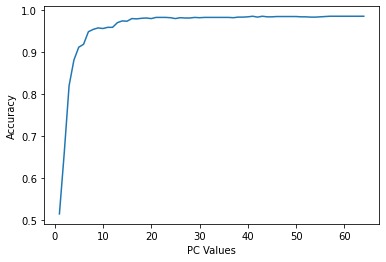

In [42]:
plt.plot(range(1,65), accuracy_list)
plt.ylabel('Accuracy')
plt.xlabel('PC Values')

In [43]:
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-3.806972,-0.762353,-1.981745,-1.241902,-1.926016,1.708180,0.118980,-1.737105,-0.334048,0.155811,...,-0.316694,-0.305804,-0.016301,0.264197,0.362151,0.055375,-0.003551,0.000000e+00,-0.000000e+00,7.203496e-15
1,2.706772,0.985010,-3.093263,-4.090354,-0.314418,0.923529,1.899720,-0.178551,-1.099549,0.541563,...,-0.119631,0.136834,-0.197849,-0.184090,-0.023752,-0.119777,-0.041736,-1.014866e-16,-5.731277e-17,4.717562e-17
2,-1.875040,-0.586259,0.025851,-1.458836,-0.387337,0.288262,1.600423,-1.774906,0.527612,-0.223360,...,-0.334997,-0.160068,0.134346,-0.054102,0.206992,-0.315449,0.058982,6.865778e-16,-4.189473e-17,-1.078469e-16
3,-4.188463,3.264263,1.434903,3.787396,1.109394,0.870372,2.532590,-1.705008,-1.871973,0.434290,...,0.528239,-0.015123,-0.105772,0.066680,0.075781,-0.096029,-0.028511,2.153337e-16,2.471406e-16,1.661149e-17
4,-0.759938,1.592627,-3.138049,-0.593354,-0.196136,-0.595561,0.866253,0.549402,-0.183254,-0.240831,...,0.170132,-0.079203,0.270092,-0.182597,-0.096756,-0.090261,0.057124,1.921231e-16,-1.408782e-16,3.752618e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.608133,2.305245,-1.419637,-1.319994,0.776468,-0.396090,0.512074,0.515910,1.199450,-0.726217,...,0.178430,-0.186958,0.538635,0.401713,0.320665,0.131800,0.212507,5.326296e-17,4.198184e-17,-1.213150e-17
1433,0.511413,1.218487,-0.221379,-0.088338,0.700141,-1.358485,0.661075,0.830278,0.995568,-0.172373,...,0.187069,-0.588471,-0.193879,0.417202,0.294628,0.187941,-0.103895,2.718284e-16,1.636452e-17,-2.201464e-17
1434,-0.736783,-1.238905,-0.048362,-0.600326,0.029270,0.109190,-0.015670,-0.858145,1.403713,-1.187124,...,0.020321,-0.153543,-0.230250,0.057210,-0.062775,0.575475,0.108348,-1.430479e-16,3.084321e-17,-1.732616e-17
1435,-2.526435,1.357900,-1.357264,0.659848,-0.079780,0.749792,2.240776,0.846507,0.676734,-1.342595,...,-0.177704,-0.879487,-0.578543,0.066651,0.293642,-0.226380,0.278342,-6.990199e-18,1.272191e-17,-4.900187e-17


In [44]:
array1 = np.cumsum(pca.explained_variance_ratio_)

In [45]:
array1

array([0.12120025, 0.21746322, 0.30195597, 0.36736742, 0.41602861,
       0.45849028, 0.49884386, 0.53215108, 0.56245418, 0.59158534,
       0.61924999, 0.64526847, 0.66735562, 0.68931068, 0.71089888,
       0.72991767, 0.74789673, 0.7642532 , 0.78036797, 0.7946995 ,
       0.80854008, 0.82134053, 0.83317075, 0.84367974, 0.85342131,
       0.862882  , 0.87155876, 0.87982581, 0.88779957, 0.89513976,
       0.90219042, 0.90893926, 0.91535058, 0.92145231, 0.92724229,
       0.93269025, 0.93785   , 0.94273506, 0.94734651, 0.95159867,
       0.9555348 , 0.95935857, 0.96292156, 0.96632   , 0.96957028,
       0.9725621 , 0.97543312, 0.97815097, 0.98071614, 0.98308771,
       0.98521679, 0.98723219, 0.98916521, 0.99089331, 0.99256408,
       0.9941546 , 0.99564937, 0.99696915, 0.99815786, 0.99917936,
       1.        , 1.        , 1.        , 1.        ])

In [49]:
np.where(array1 > .90)[0][0]

30

In [51]:
# plt.plot(array1)

In [52]:
std_scaler = StandardScaler()
std_array = std_scaler.fit_transform(x_train)
x_train_std = pd.DataFrame(std_array, columns=x_train.columns)


pca = PCA(n_components=30)
x_train_pca = pca.fit_transform(x_train_std)
pc_names = [f'PC{i}' for i in range(1,x_train_pca.shape[1] + 1)]
x_train_pca = pd.DataFrame(x_train_pca, columns=pc_names)
x_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-3.806972,-0.762354,-1.981743,-1.241903,-1.926017,1.708194,0.118946,-1.737087,-0.333982,0.155764,...,-0.631727,-0.799598,-0.305592,-0.084936,-0.187996,-0.060055,-0.420442,-0.258260,0.308202,-0.225880
1,2.706772,0.985011,-3.093261,-4.090352,-0.314438,0.923571,1.899714,-0.178453,-1.099508,0.541560,...,-0.184652,1.296359,0.946168,0.065794,1.042269,-0.336936,0.163916,0.069477,0.113520,-0.345763
2,-1.875040,-0.586260,0.025849,-1.458839,-0.387335,0.288255,1.600438,-1.774952,0.527626,-0.223483,...,-0.106073,-0.307691,0.777762,0.155624,0.734239,0.558164,0.838914,-0.101850,-0.679323,-1.296075
3,-4.188463,3.264267,1.434914,3.787410,1.109340,0.870520,2.532472,-1.704619,-1.871691,0.434457,...,0.871474,-0.511651,-0.753790,-0.337320,0.070118,-0.742441,0.801493,0.266006,-0.685580,-0.526244
4,-0.759938,1.592626,-3.138049,-0.593354,-0.196145,-0.595535,0.866192,0.549359,-0.183301,-0.240764,...,0.946728,-0.355728,-0.076422,0.976255,0.090457,-1.234833,-0.319663,-0.728424,-0.508435,0.185428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.608132,2.305244,-1.419637,-1.319995,0.776467,-0.396082,0.512032,0.515855,1.199474,-0.726246,...,0.997860,-1.303628,0.613248,-0.175178,0.243751,-1.097708,-0.743482,-0.888277,-0.100160,-2.826178
1433,0.511413,1.218483,-0.221383,-0.088345,0.700153,-1.358512,0.661040,0.830077,0.995457,-0.172435,...,1.127475,-0.059220,0.624785,0.479136,-0.172198,0.294269,-1.063890,-0.881260,-0.817546,-0.786519
1434,-0.736784,-1.238903,-0.048356,-0.600319,0.029246,0.109253,-0.015738,-0.857955,1.403908,-1.187044,...,-0.054308,-0.726918,0.357102,0.629538,-0.450859,-0.641516,0.661370,-1.074026,-0.399880,-0.054842
1435,-2.526435,1.357900,-1.357260,0.659851,-0.079787,0.749820,2.240704,0.846507,0.676759,-1.342533,...,-0.166890,0.789708,0.332364,-0.975799,0.121208,-0.678563,-0.203602,0.447721,0.381129,-0.286977


In [56]:
px.scatter_3d(x_train_pca['PC1'], x_train_pca['PC2'], x_train_pca['PC3'], color = y_train)